# Importing the Dataset

In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Kartik\Downloads\file.csv")

In [2]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# Basic Data Analysis


In [4]:
df.shape

(7789, 11)

In [5]:
df.size

85679

In [7]:
df.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [8]:
df.dtypes

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


# Checking for Duplicates/Nulls


In [18]:
df[df.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description


In [17]:
df.drop_duplicates(inplace = True)

In [19]:
# Duplicate Removed

In [23]:
df.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

In [24]:
import seaborn as sns

<Axes: >

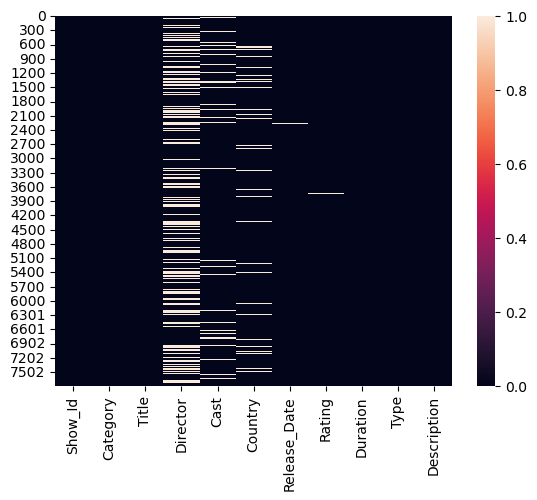

In [25]:
sns.heatmap(df.isnull())

# Finding information about a particular show

In [27]:
df.loc[df['Title'] == 'House of Cards', ['Show_Id', 'Director', 'Cast']]

,Show_Id,Director,Cast
2832,s2833,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S..."


In [36]:
df.query('Title == "House of Cards"')

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


# Visualizing Data (Bar Graph)

In [38]:
df.dtypes

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

In [39]:
df['Data_New'] = pd.to_datetime(df['Release_Date'])

In [42]:
df['Data_New'].dt.year.value_counts()

2019.0    2153
2020.0    2009
2018.0    1685
2017.0    1225
2016.0     443
2021.0     117
2015.0      88
2014.0      25
2011.0      13
2013.0      11
2012.0       3
2008.0       2
2009.0       2
2010.0       1
Name: Data_New, dtype: int64

Text(0, 0.5, 'Total Movies')

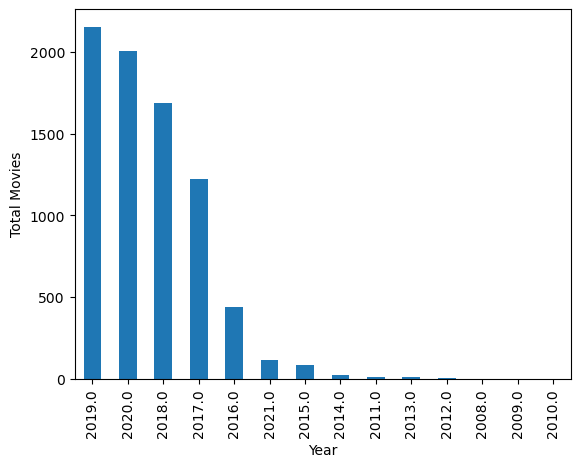

In [48]:
ax1 = df['Data_New'].dt.year.value_counts().plot(kind = 'bar')
ax1.set_xlabel("Year")
ax1.set_ylabel("Total Movies")

In [45]:
import matplotlib as plt

In [52]:
df.groupby('Category').Category.count()

Category
Movie      5377
TV Show    2410
Name: Category, dtype: int64

<Axes: xlabel='Category'>

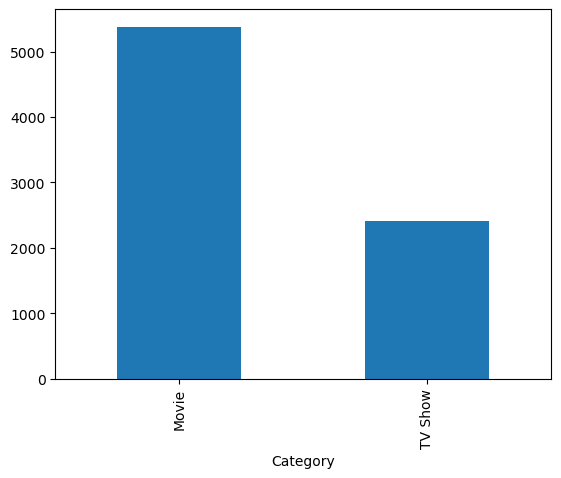

In [53]:
df.groupby('Category').Category.count().plot(kind = 'bar')

<Axes: xlabel='Category', ylabel='count'>

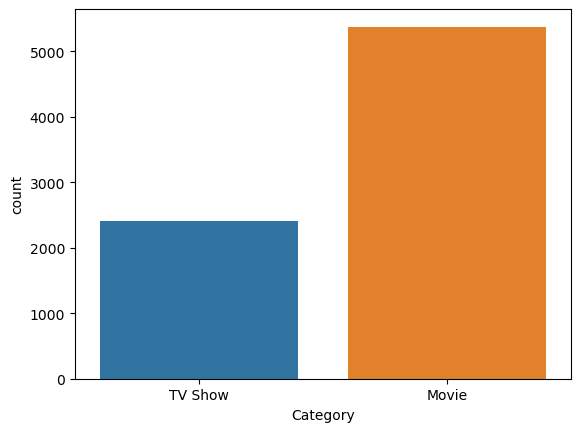

In [56]:
sns.countplot(x = df['Category'])

# All Movies Released in 2000


In [62]:
df['Year'] = df['Date_New'].dt.year

In [61]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_New,Year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,2020.0
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,2018.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16,2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020.0


In [60]:
df = df.rename(columns ={'Data_New' : 'Date_New'})

In [77]:
df[(df['Category'] == 'Movie') & (df['Year'] == 2000)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_New,Year


In [78]:
# Thus, we can see that no movies on the database were released in 2000.

# Find TV show Titles released only in Canada.

In [90]:
 df[(df['Category'] == 'TV Show') & (df['Country'] == 'Canada')] [['Title', 'Date_New']]

,Title,Date_New
87,21 Thunder,2018-03-01
389,Alias Grace,2017-11-03
539,Anne with an E,2020-01-03
685,Bad Blood,2019-05-31
783,Beast Legends,2019-02-01
791,Beauty & the Beast,2016-09-19
862,Between,2016-07-01
940,Bitten,2016-05-26
994,Blown Away,2019-07-12
1010,Bo on the Go!,2019-03-21


# Find the Directors with the most number of Shows or Movies

In [95]:
df['Director'].value_counts().head(10)

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Hakan Algül                8
Name: Director, dtype: int64

# Find Movies based on filters (Ex.: Horror Movies in the US)

In [111]:
df[(df['Category'] == 'Movie') & (df['Type'] == 'Horror Movies') & (df['Country'] == 'United States')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_New,Year
417,s418,Movie,All the Boys Love Mandy Lane,Jonathan Levine,"Anson Mount, Edwin Hodge, Michael Welch, Brook...",United States,"July 3, 2018",R,91 min,Horror Movies,During a weekend excursion to a secluded ranch...,2018-07-03,2018.0
1551,s1552,Movie,Cult of Chucky,Don Mancini,"Fiona Dourif, Michael Therriault, Adam Hurtig,...",United States,"October 3, 2017",R,90 min,Horror Movies,Following a string of murders in the asylum wh...,2017-10-03,2017.0
1654,s1655,Movie,Deadcon,Caryn Waechter,"Lauren Elizabeth, Claudia Sulewski, Keith Mach...",United States,"January 16, 2020",TV-14,78 min,Horror Movies,"A group of uber-popular, social media influenc...",2020-01-16,2020.0
1671,s1672,Movie,Death House,Harrison Smith,"Cody Longo, Cortney Palm, Adrienne Barbeau, Mi...",United States,"May 5, 2019",R,88 min,Horror Movies,Two federal agents battle through an army of r...,2019-05-05,2019.0
1976,s1977,Movie,Eli,Ciarán Foy,"Charlie Shotwell, Lili Taylor, Kelly Reilly, M...",United States,"October 18, 2019",TV-MA,98 min,Horror Movies,"With his desperate parents in tow, an 11-year-...",2019-10-18,2019.0
2104,s2105,Movie,Family Blood,Sonny Mallhi,"James Ransone, Vinessa Shaw, Ajiona Alexus, Co...",United States,"May 5, 2018",TV-MA,92 min,Horror Movies,A former addict moves to a new city with her c...,2018-05-05,2018.0
2286,s2287,Movie,Friday the 13th,Marcus Nispel,"Jared Padalecki, Danielle Panabaker, Amanda Ri...",United States,"January 1, 2020",R,97 min,Horror Movies,A group of teenage camp counselors raises the ...,2020-01-01,2020.0
2422,s2423,Movie,Girl on the Third Floor,Travis Stevens,"CM Punk, Trieste Kelly Dunn, Sarah Brooks, Eli...",United States,"February 22, 2020",TV-MA,92 min,Horror Movies,A husband with a bad track record tries to sta...,2020-02-22,2020.0
2704,s2705,Movie,Here Alone,Rod Blackhurst,"Lucy Walters, Gina Piersanti, Adam David Thomp...",United States,"July 1, 2017",TV-MA,97 min,Horror Movies,When she finally encounters two other survivor...,2017-07-01,2017.0
2833,s2834,Movie,House of the Witch,Alex Merkin,"Emily Bader, Darren Mann, Michelle Randolph, C...",United States,"October 11, 2020",TV-MA,86 min,Horror Movies,A group of daring teens finds themselves in a ...,2020-10-11,2020.0


In [106]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_New,Year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,2020.0
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,2018.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16,2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020.0


# How many Titles casted Tom Hanks

In [ ]:
#Creating new db since str.contains doesn't apply with null values

In [117]:
df_new = df.dropna()

In [119]:
df_new.isnull().sum()

Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
Date_New        0
Year            0
dtype: int64

In [125]:
df_new[df_new['Cast'].str.contains('Tom Hanks')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_New,Year
521,s522,Movie,Angels & Demons,Ron Howard,"Tom Hanks, Ewan McGregor, Ayelet Zurer, Stella...","United States, Italy","December 1, 2020",PG-13,139 min,Thrillers,A Harvard symbologist races to uncover clues t...,2020-12-01,2020.0
1242,s1243,Movie,Catch Me If You Can,Steven Spielberg,"Leonardo DiCaprio, Tom Hanks, Christopher Walk...","United States, Canada","January 1, 2021",PG-13,141 min,Dramas,An FBI agent makes it his mission to put cunni...,2021-01-01,2021.0
1424,s1425,Movie,Cloud Atlas,"Lilly Wachowski, Lana Wachowski, Tom Tykwer","Tom Hanks, Halle Berry, Jim Broadbent, Hugo We...","Germany, United States, Hong Kong, Singapore","August 1, 2017",R,172 min,"Action & Adventure, Cult Movies, Dramas","In this star-studded drama, six seemingly disp...",2017-08-01,2017.0
1686,s1687,Movie,Defying the Nazis: The Sharps' War,"Ken Burns, Artemis Joukowsky","Tom Hanks, Marina Goldman",United States,"May 1, 2017",TV-14,79 min,Documentaries,This film documents the story of minister Wait...,2017-05-01,2017.0
4845,s4845,Movie,Philadelphia,Jonathan Demme,"Tom Hanks, Denzel Washington, Jason Robards, M...",United States,"July 1, 2019",PG-13,126 min,"Classic Movies, Dramas, LGBTQ Movies",Philadelphia attorney Andrew Beckett launches ...,2019-07-01,2019.0
5417,s5417,Movie,Saving Mr. Banks,John Lee Hancock,"Emma Thompson, Tom Hanks, Paul Giamatti, Jason...","United States, United Kingdom, Australia","March 2, 2019",PG-13,126 min,"Comedies, Dramas",When Walt Disney sets his sights on obtaining ...,2019-03-02,2019.0
6263,s6263,Movie,The Da Vinci Code,Ron Howard,"Tom Hanks, Audrey Tautou, Ian McKellen, Jean R...","United States, Malta, France, United Kingdom","December 1, 2020",PG-13,149 min,Thrillers,"When the curator of the Louvre is killed, a Ha...",2020-12-01,2020.0
6771,s6770,Movie,The Polar Express,Robert Zemeckis,"Tom Hanks, Leslie Zemeckis, Eddie Deezen, Nona...",United States,"January 1, 2021",G,100 min,Children & Family Movies,"In this warm-hearted tale, a young boy's faith...",2021-01-01,2021.0


# Find Titles with an R Rating that released after 2018


In [134]:
df[(df['Rating'] == 'R') & (df['Category'] == 'Movie')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_New,Year
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,2018.0
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",R,119 min,Dramas,After one of his high school students attacks ...,2019-11-01,2019.0
14,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,"March 19, 2020",R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",Stranded when the Earth is suddenly destroyed ...,2020-03-19,2020.0
17,s18,Movie,22-Jul,Paul Greengrass,"Anders Danielsen Lie, Jon Øigarden, Jonas Stra...","Norway, Iceland, United States","October 10, 2018",R,144 min,"Dramas, Thrillers","After devastating terror attacks in Norway, a ...",2018-10-10,2018.0
65,s66,Movie,13 Sins,Daniel Stamm,"Mark Webber, Rutina Wesley, Devon Graye, Tom B...",United States,"January 13, 2019",R,93 min,"Horror Movies, Thrillers",A man agrees to appear on a game show with a $...,2019-01-13,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7712,s7711,Movie,"Yes, God, Yes",Karen Maine,"Natalia Dyer, Timothy Simons, Wolfgang Novogra...",United States,"October 22, 2020",R,78 min,"Comedies, Dramas, Independent Movies",A devoutly religious teen grapples with her ow...,2020-10-22,2020.0
7738,s7737,Movie,Young Adult,Jason Reitman,"Charlize Theron, Patton Oswalt, Patrick Wilson...",United States,"November 20, 2019",R,94 min,"Comedies, Dramas, Independent Movies",When a divorced writer gets a letter from an o...,2019-11-20,2019.0
7760,s7759,Movie,Zack and Miri Make a Porno,Kevin Smith,"Seth Rogen, Elizabeth Banks, Craig Robinson, J...",United States,"October 1, 2018",R,101 min,"Comedies, Independent Movies, Romantic Movies",Zack and Miri make and star in an adult film t...,2018-10-01,2018.0
7776,s7775,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019-11-20,2019.0


In [136]:
df[(df['Rating'] == 'R') & (df['Category'] == 'Movie') & (df['Year'] > 2018)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_New,Year
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",R,119 min,Dramas,After one of his high school students attacks ...,2019-11-01,2019.0
14,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,"March 19, 2020",R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",Stranded when the Earth is suddenly destroyed ...,2020-03-19,2020.0
65,s66,Movie,13 Sins,Daniel Stamm,"Mark Webber, Rutina Wesley, Devon Graye, Tom B...",United States,"January 13, 2019",R,93 min,"Horror Movies, Thrillers",A man agrees to appear on a game show with a $...,2019-01-13,2019.0
68,s69,Movie,14 Blades,Daniel Lee,"Donnie Yen, Zhao Wei, Wu Chun, Law Kar-Ying, K...","Hong Kong, China, Singapore","April 3, 2019",R,113 min,"Action & Adventure, International Movies","In the age of the Ming Dynasty, Quinglong is t...",2019-04-03,2019.0
83,s84,Movie,20th Century Women,Mike Mills,"Annette Bening, Elle Fanning, Greta Gerwig, Lu...",United States,"June 28, 2019",R,119 min,"Dramas, Independent Movies","In 1979, single bohemian mom Dorothea, hoping ...",2019-06-28,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7659,s7658,Movie,Woodshock,"Kate Mulleavy, Laura Mulleavy","Kirsten Dunst, Joe Cole, Pilou Asbæk, Jack Kil...",United States,"June 21, 2020",R,101 min,"Dramas, Independent Movies, Thrillers","Shattered after her mother's death, a woman fl...",2020-06-21,2020.0
7712,s7711,Movie,"Yes, God, Yes",Karen Maine,"Natalia Dyer, Timothy Simons, Wolfgang Novogra...",United States,"October 22, 2020",R,78 min,"Comedies, Dramas, Independent Movies",A devoutly religious teen grapples with her ow...,2020-10-22,2020.0
7738,s7737,Movie,Young Adult,Jason Reitman,"Charlize Theron, Patton Oswalt, Patrick Wilson...",United States,"November 20, 2019",R,94 min,"Comedies, Dramas, Independent Movies",When a divorced writer gets a letter from an o...,2019-11-20,2019.0
7776,s7775,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019-11-20,2019.0


In [137]:
df[(df['Rating'] == 'R') & (df['Category'] == 'Movie') & (df['Year'] > 2018)].shape

(449, 13)

# Longest Duration on a Title


In [143]:
df['Duration'].unique()

array(['4 Seasons', '93 min', '78 min', '80 min', '123 min', '1 Season',
       '95 min', '119 min', '118 min', '143 min', '103 min', '89 min',
       '91 min', '149 min', '144 min', '124 min', '87 min', '110 min',
       '128 min', '117 min', '100 min', '2 Seasons', '84 min', '99 min',
       '90 min', '102 min', '104 min', '105 min', '56 min', '125 min',
       '81 min', '97 min', '106 min', '107 min', '109 min', '44 min',
       '75 min', '101 min', '3 Seasons', '37 min', '113 min', '114 min',
       '130 min', '94 min', '140 min', '135 min', '82 min', '70 min',
       '121 min', '92 min', '164 min', '53 min', '83 min', '116 min',
       '86 min', '120 min', '96 min', '126 min', '129 min', '77 min',
       '137 min', '148 min', '28 min', '122 min', '176 min', '85 min',
       '22 min', '68 min', '111 min', '29 min', '142 min', '168 min',
       '21 min', '59 min', '20 min', '98 min', '108 min', '76 min',
       '26 min', '156 min', '30 min', '57 min', '150 min', '133 min',
       '1

In [145]:
df[['Minutes', 'Unit']] = df['Duration'].str.split(' ', expand = True)

In [146]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_New,Year,Minutes,Unit
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,2020.0,4,Seasons
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0,93,min
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,2018.0,78,min
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16,2017.0,80,min
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020.0,123,min


In [151]:
df['Minutes']=df.Minutes.astype('int64')

In [152]:
df['Minutes'].max()

312

In [161]:
df[(df['Minutes'] == 312) & (df['Category'] == 'Movie')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_New,Year,Minutes,Unit
957,s958,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",TV-MA,312 min,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",2018-12-28,2018.0,312,min


# Country with the most shows

In [172]:
df_tv = df[df['Category'] == 'TV Show']

In [174]:
df_tv['Country'].value_counts()

United States                                                705
United Kingdom                                               204
Japan                                                        157
South Korea                                                  147
India                                                         71
                                                            ... 
Canada, United States, United Kingdom, France, Luxembourg      1
United States, Italy                                           1
Chile, Italy                                                   1
Canada, United Kingdom                                         1
United States, France, South Korea, Indonesia                  1
Name: Country, Length: 183, dtype: int64

In [175]:
df_tv['Country'].value_counts().head(1)

United States    705
Name: Country, dtype: int64

# Sorting Dataset

In [181]:
df.sort_values(by= 'Date_New')

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_New,Year,Minutes,Unit
7115,s7114,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,"January 1, 2008",TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",2008-01-01,2008.0,81,min
1765,s1766,TV Show,Dinner for Five,NaN,NaN,United States,"February 4, 2008",TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",2008-02-04,2008.0,1,Season
3248,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,2009-05-05,2009.0,104,min
5766,s5766,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",2009-11-18,2009.0,29,min
3840,s3841,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",2010-11-01,2010.0,84,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374,s3375,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...,NaT,NaN,2,Seasons
3492,s3493,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder...",NaT,NaN,3,Seasons
3946,s3947,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",NaT,NaN,4,Seasons
5138,s5138,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",NaT,NaN,13,Seasons


# Graphing Data

Text(0.5, 1.0, 'Total Titles per Rating type')

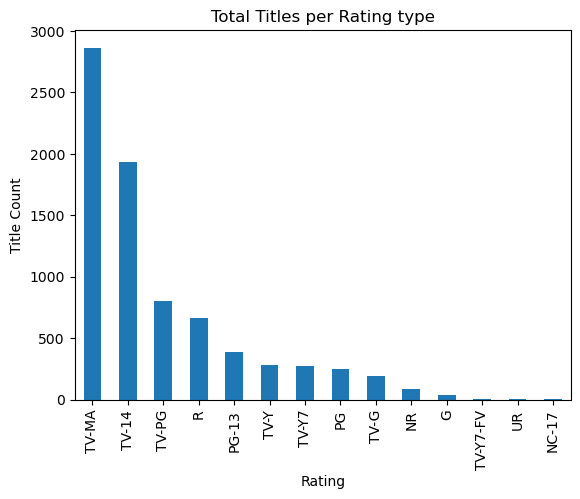

In [187]:
ax1 = df['Rating'].value_counts().plot(kind= 'bar')
ax1.set_xlabel('Rating')
ax1.set_ylabel('Title Count')
ax1.set_title('Total Titles per Rating type')

In [196]:
import matplotlib.pyplot as plt

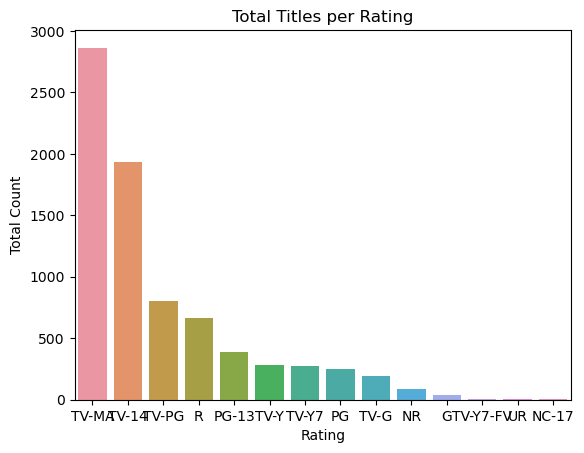

In [199]:
# OR
fig = sns.countplot(x = df['Rating'], order=df['Rating'].value_counts().index)
plt.ylabel('Total Count')
plt.title('Total Titles per Rating')
plt.show()

Text(0.5, 1.0, 'Total Titles per Year')

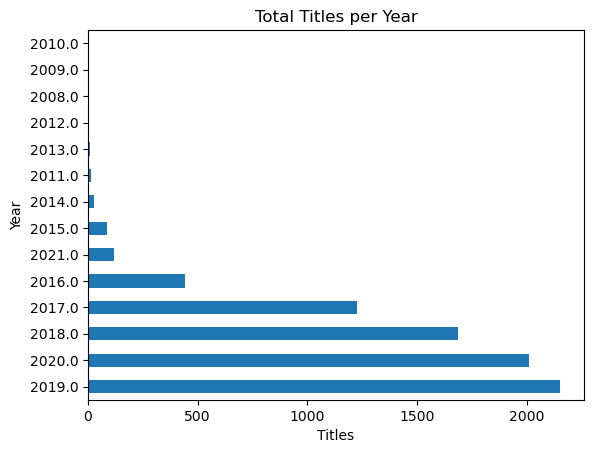

In [233]:
ax = df['Year'].value_counts().plot(kind = 'barh')
ax.set_xlabel('Titles')
ax.set_ylabel('Year')
ax.set_title('Total Titles per Year')

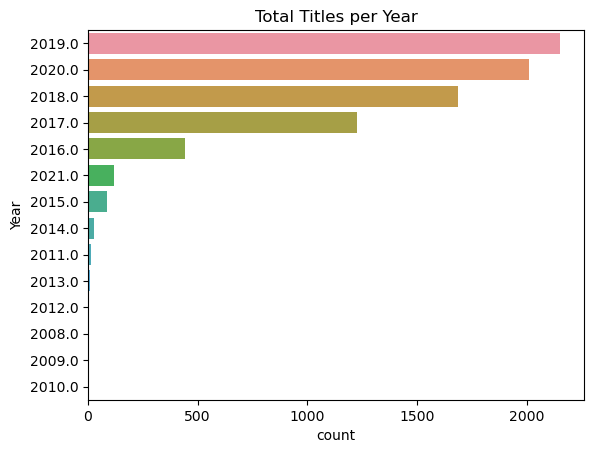

In [236]:
fig = sns.countplot(y = df['Year'], order=df['Year'].value_counts().index)
plt.title('Total Titles per Year')
plt.show()